# Chapter 2 : Quantitative Exploratory Data Analysis

In this chapter, you will compute useful summary statistics, which serve to concisely describe salient features of a dataset with a few numbers.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


iris = pd.read_csv('iris.csv')
print(iris.head())

versicolor_petal_length = iris[iris['Species'] == 'Iris-versicolor']['PetalLengthCm']
versicolor_petal_length.head()

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
Name: PetalLengthCm, dtype: float64

In [30]:
# Compute the mean: mean_length_vers
mean_length_vers = versicolor_petal_length.mean()

# Compute the mean: mean_length_vers
median_length_vers = versicolor_petal_length.median()

# Print the result with some nice formatting
print('I. The versicolor mean:', mean_length_vers, 'cm')
print('I. The versicolor median :', median_length_vers, 'cm')

I. The versicolor mean: 4.26 cm
I. The versicolor median : 4.35 cm


### Computing percentiles

In [31]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)

[3.3    4.     4.35   4.6    4.9775]


### Comparing percentiles to ECDF

In [32]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

versicolor_petal_length = iris['PetalLengthCm']
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

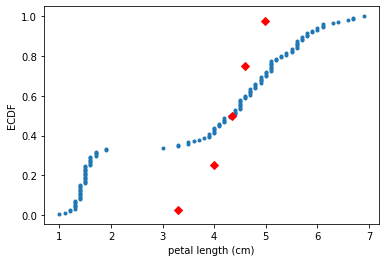

In [33]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot

_ = plt.show()

## Box-and-whisker plot

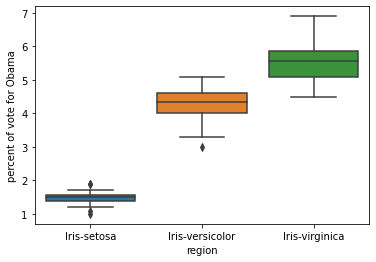

In [36]:
# Create box plot with Seaborn's default settings
_ = sns.boxplot(x='Species', y='PetalLengthCm', data=iris)

# Label the axes
_ = plt.xlabel('region')
_ = plt.ylabel('percent of vote for Obama')


# Show the plot
plt.show()

## Computing the variance

In [48]:
versicolor_petal_length = versicolor_petal_length.sort_values(ascending=False).head(50)
# Array of differences to mean: differences
differences = versicolor_petal_length - versicolor_petal_length.mean()

# Square the differences: diff_sq
diff_sq = differences**2

# Compute the mean square difference: variance_explicit
variance_explicit = diff_sq.mean()

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_np, variance_explicit)


0.2721000000000001 0.2721000000000001


### The standard deviation and the variance

 the standard deviation is the square root of the variance.

In [47]:
# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length))

0.5216320542297992
0.5216320542297992


## Covariance and the Pearson correlation coefficient

### Scatter plots

When you made bee swarm plots, box plots, and ECDF plots in previous exercises, you compared the petal lengths of different species of iris. But what if you want to compare two properties of a single species? This is exactly what we will do in this exercise. We will make a scatter plot of the petal length and width measurements of Anderson's Iris versicolor flowers.

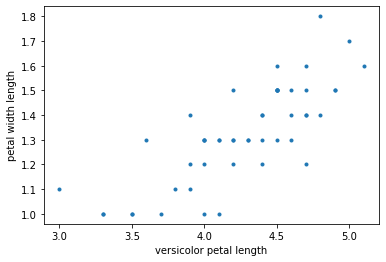

In [50]:
versicolor_petal_length = iris[iris['Species'] == 'Iris-versicolor']['PetalLengthCm']
versicolor_petal_width = iris[iris['Species'] == 'Iris-versicolor']['PetalWidthCm']
# Make a scatter plot
_ = plt.plot(versicolor_petal_length, versicolor_petal_width, marker='.', linestyle='none')


# Label the axes
_= plt.xlabel('versicolor petal length')
_= plt.ylabel('petal width length')


# Show the result
_= plt.show()

### Computing the covariance

The covariance may be computed using the Numpy function np.cov(). For example, we have two sets of data x and y, np.cov(x, y) returns a 2D array where entries [0,1] and [1,0] are the covariances. Entry [0,0] is the variance of the data in x, and entry [1,1] is the variance of the data in y.

In [52]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0,1]

# Print the length/width covariance
print("The covariance is : ", petal_cov)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
The covariance is :  0.07310204081632653


### Computing the Pearson correlation coefficient

As mentioned in the video, the Pearson correlation coefficient, also called the Pearson r, is often easier to interpret than the covariance. It is computed using the np.corrcoef() function. Like np.cov(), it takes two arrays as arguments and returns a 2D array. Entries [0,0] and [1,1] are necessarily equal to 1 (can you think about why?), and the value we are after is entry [0,1].